In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("covid.csv")
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [12]:
x.shape

(25, 7)

In [72]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

x = pd.get_dummies(x, columns=list(x.columns))
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2, random_state=42)

model = GaussianNB()
history = model.fit(xtr, ytr)

y_pred = model.predict(xte)

print(metrics.classification_report(yte, y_pred))

              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



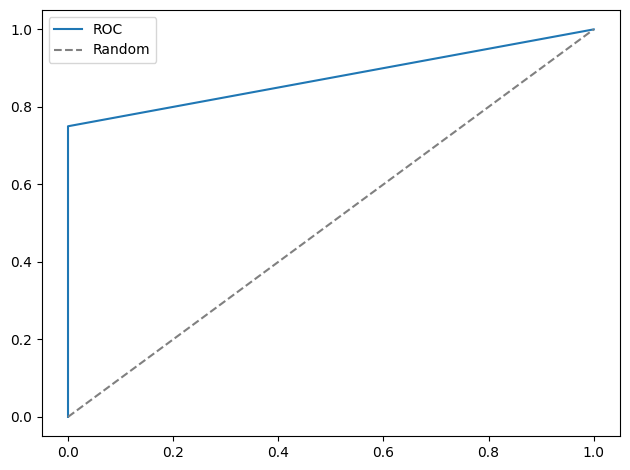

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(yte, y_pred)
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], color='gray', ls='--', label='Random')
plt.legend()
plt.tight_layout()
plt.show()

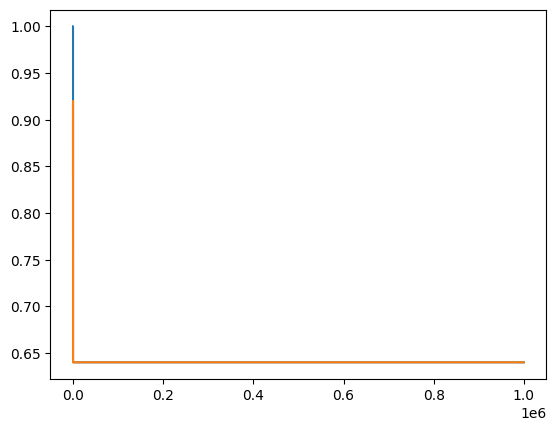

In [87]:
param_range = np.logspace(-6, 6, 13)
train_scores, test_scores = validation_curve(GaussianNB(), x, y, param_name='var_smoothing', param_range=param_range)
plt.plot(param_range, train_scores.mean(axis=1), label="Training Score")
plt.plot(param_range, test_scores.mean(axis=1), label="Validation Score")

In [86]:
train_scores.mean(axis=1)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 0.96, 0.93, 0.64, 0.64, 0.64,
       0.64, 0.64])